### Estatística descritiva - introdução & revisão
  
Usando:  
  - Pandas
  - Numpy
  - Matplotlib e Seaborn

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### O que é média?

Vamos supor que temos:

sequencia = {x1, x2, x3 .... xn}

<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### media de X = valor esperado de X

media = soma de todos os elementos dividido pelo número de elementos

normalmente se utiliza 
  - X (maiúsculo) para a lista, série de dados
  - x (minúsculo) para um determinado (particular) dado

### O que é desvio padrão populacional?
   Dado que conheço uma população, dada uma medida, qual a sua dispersão.

### O que é desvio padrão (amostral)?
   É a dispersão de uma medida dada uma amostra.
   Importante, que se você fizer **3 experimentos distintos**, você vai gerar 3 desvios padrões distintos e obviamente 3 medias distintas.
   A isto se chama replicata biológica (3 experimentos: triplicata)

### O que influência o número amostral?

Dado que conheço uma amostra (n amostral << Npop)  
  - Um n amostral:
    - pequeno (N < 30): gera erros ao estimar a media e o desvio padrão
    - grande  (30 >= N >= 100): minimiza estes erros
    - muito grande (N >> 30): valores esperados (media e desvio padrão) muito próxima "da realidade" (população)


<font size="5">Var[X] \= variança de x \= $\frac{\sum_{i=1}^n{ (x_i - <x>)^2 }}{n}$</font>

<font size="5">SD[X] = SQRT(Var[X])</font>

#### Por que desvio padrão é a soma das diferenças entre cada valor e a média ao quadrado?

In [36]:
x = [2, 5, 17, 9, 11, 15, 8, 23]

# posso utilizar numpy para achar media, SD ....
x, len(x), np.mean(x), np.round(np.std(x), 2)

([2, 5, 17, 9, 11, 15, 8, 23], 8, 11.25, 6.38)

In [34]:
n = len(x)

# inicialização, com valor 0
media = 0
for xi in x:
    media += xi

media = media / n
media

11.25

In [32]:
# inicialização, com valor 0
sd = 0

for xi in x:
    sd += (xi - media)**2
    
sd /= n
sd = np.sqrt(sd)
np.round(sd, 2)

6.38

### Mediana

#### O valor que separa metade da amostra inferior e metade superior

Analisar o peso 100 camundongos após um dado tratamento:
  - ordeno os camundos por peso (menor --> maior peso)
    - vou ter os 50 primeiros
    - vou ter os 50 últimos mais pesados
    - o valor intermediário = MEDIANA

#### Importante: quando a distribuição não é simétrica ou há dúvidas, use sempre a Mediana e não a Media

#### Mediana é o melhor parâmetro para avaliar o valor central de uma distribuição

(mais adiante vamos ver o que é distribuição)

In [37]:
x

[2, 5, 17, 9, 11, 15, 8, 23]

In [39]:
x.sort()
x, len(x)

([2, 5, 8, 9, 11, 15, 17, 23], 8)

In [40]:
np.median(x), "é o valor entre 9 e 11"

(10.0, 'é o valor entre 9 e 11')

### Moda

#### é o valor com mais alta frequência

#### uma distriuição pode ter múltiplas modas (multimodal)

In [41]:
MU = 20
SD = 2
N = 100

x = np.random.normal(MU, SD, N)
x[:10]

array([20.05862993, 22.2325658 , 20.42031308, 21.85331229, 20.96046959,
       22.55010201, 20.72641431, 21.14833725, 19.2902451 , 19.79808095])

(array([ 2.,  2., 11.,  9., 17., 19., 15., 14.,  7.,  4.]),
 array([15.29333316, 16.22392308, 17.15451301, 18.08510293, 19.01569286,
        19.94628278, 20.87687271, 21.80746263, 22.73805256, 23.66864248,
        24.5992324 ]),
 <BarContainer object of 10 artists>)

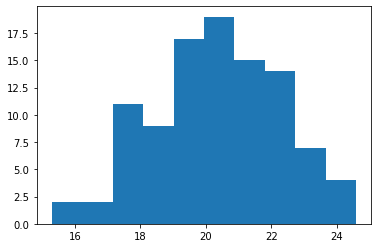

In [46]:
plt.hist(x)

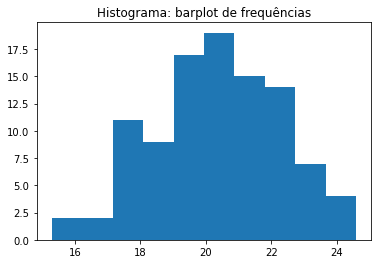

In [53]:
# na distribuição normal: media == mediana == moda
ret = plt.hist(x);
plt.title("Histograma: barplot de frequências");

In [47]:
ret

(array([ 2.,  2., 11.,  9., 17., 19., 15., 14.,  7.,  4.]),
 array([15.29333316, 16.22392308, 17.15451301, 18.08510293, 19.01569286,
        19.94628278, 20.87687271, 21.80746263, 22.73805256, 23.66864248,
        24.5992324 ]),
 <BarContainer object of 10 artists>)

In [58]:
# frequencia
counts = ret[0]

# bins do eixo x ~ posx
posx   = ret[1]
posx   = [np.round((posx[i]+posx[i+1])/2, 1) for i in range(len(posx)-1)]
posx

[15.8, 16.7, 17.6, 18.6, 19.5, 20.4, 21.3, 22.3, 23.2, 24.1]

In [59]:
len(posx), len(counts)

(10, 10)

In [60]:
counts = [int(count) for count in counts]
counts

[2, 2, 11, 9, 17, 19, 15, 14, 7, 4]

In [64]:
# comprehension: tuplica os valores de posx
vals = [ [posx[i]]*counts[i] for i in range(len(posx))]
vals[0:2]

[[15.8, 15.8], [16.7, 16.7]]

In [65]:
# A = A + B (soma de listas, [1,2] + [1,2,3] = [1,2,1,2,3])
vals = np.sum(vals)
vals[:10]

[15.8, 15.8, 16.7, 16.7, 17.6, 17.6, 17.6, 17.6, 17.6, 17.6]

In [67]:
from statistics import mode

mu = np.mean(x)
ssd = np.std(x)
med = np.median(x)
mod = mode(vals)

#-- cálculo dos parametros
np.round(mu,2), np.round(ssd,2), np.round(med), mod

(20.34, 1.97, 20.0, 20.4)

Text(0.5, 1.0, 'Uma distribuição normal media=20 e sd=2 com 100 valores')

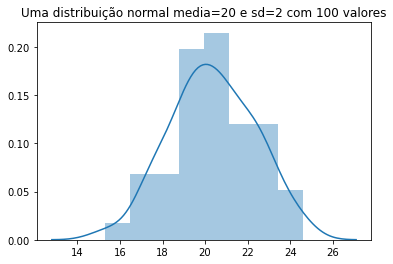

In [68]:
# distplot do seaborn = histograma
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))

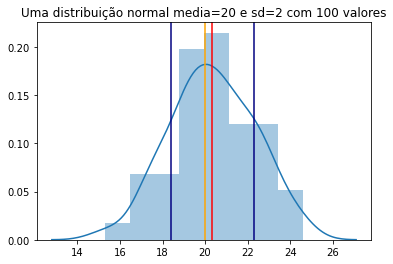

In [72]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
#-- vertical line

#- mu = media calculada
ax.axvline(mu, color='red')
#- MU = media definida e colocada na maquina np.random.normal(MU ....)
ax.axvline(MU, color='orange')

#- dispersão: Desvio Padrão
ax.axvline(mu+ssd, color='navy')
ax.axvline(mu-ssd, color='navy');

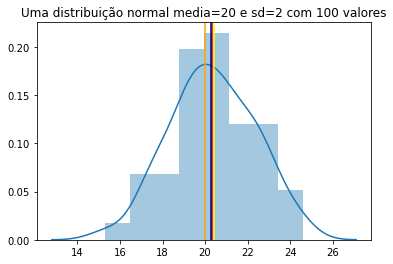

In [73]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
ax.axvline(MU, color='orange')
ax.axvline(mu, color='red')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')

(19.2, 20.8)

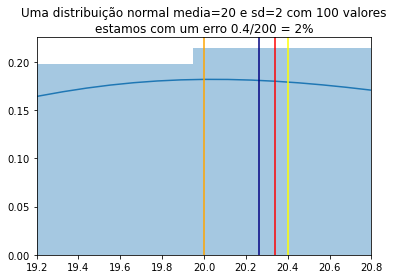

In [75]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores\nestamos com um erro 0.4/200 = 2%%"%(MU, SD, N))
ax.axvline(MU, color='orange')
ax.axvline(mu, color='red')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')
ax.set_xlim(MU-0.8, MU+0.8)

### Vamos utilizar a tabela das cobras

In [77]:
root_data = '../data/'
filename = 'Snake Morphotaxonomy.xlsx'

# merge: path + filename via join()
from os.path import join
fullpath = join(root_data, filename)

try:
    # df = pd.DataFrame()
    df = pd.read_excel(fullpath)
    print("Read '%s'"%fullpath)
except:
    print("Could not read '%s'"%fullpath)

Read '../data/Snake Morphotaxonomy.xlsx'


In [78]:
type(df)

pandas.core.frame.DataFrame

In [86]:
print(df.shape)
print(list(df.columns))
df.head(3)

(240, 9)
['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature', 'elevation']


,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173


### Média = valor esperado

In [92]:
mu = np.round(df.HL.mean(),1)
sd = np.round(df.HL.std(),1)
n  = df.HL.count()

mu, sd, n

(25.3, 7.5, 240)

### Mas, lembre-se que há várias espécies

  - Como consigo fazer uma estatística descritiva por espécie?

In [90]:
specList = df.species.unique()
specList

array(['B_jararaca', 'B_terrificus', 'B_new'], dtype=object)

In [91]:
df.species == 'B_jararaca'

0       True
1       True
2       True
3       True
4       True
       ...  
235    False
236    False
237    False
238    False
239    False
Name: species, Length: 240, dtype: bool

In [93]:
# slice = corte nos dados ~   filtro
df_jar = df[df.species == 'B_jararaca']

mu_jar = np.round(df_jar.HL.mean(),1)
sd_jar = np.round(df_jar.HL.std(),1)
n_jar  = df_jar.HL.count()

mu_jar, sd_jar, n_jar

(24.3, 8.2, 107)

In [94]:
df_ter = df[df.species == 'B_terrificus']

mu_ter = np.round(df_ter.HL.mean(),1)
sd_ter = np.round(df_ter.HL.std(),1)
n_ter  = df_ter.HL.count()

mu_ter, sd_ter, n_ter

(24.3, 6.2, 104)

In [114]:
df_ter.population.unique()

array(['SP_planalto', 'SP_costa', 'Nordeste', 'Centro-oeste'],
      dtype=object)

In [116]:
df_ter_sp = df[ (df.species == 'B_terrificus') & (df.population == 'SP_costa')]
len(df_ter_sp)

10

In [117]:
df_ter_sp

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
120,B_terrificus,SP_costa,Female,25,154,28.72,50.0,22.9,817
121,B_terrificus,SP_costa,Female,25,153,22.15,50.0,22.9,817
122,B_terrificus,SP_costa,Female,25,151,26.27,49.6,22.9,817
123,B_terrificus,SP_costa,Female,27,152,22.15,45.0,22.9,817
124,B_terrificus,SP_costa,Female,25,156,21.00,36.0,22.9,817
125,B_terrificus,SP_costa,Female,25,152,23.00,41.0,26.5,75
126,B_terrificus,SP_costa,Female,25,151,34.00,53.0,27.1,82
127,B_terrificus,SP_costa,Female,26,152,34.00,48.0,27.1,57
128,B_terrificus,SP_costa,Female,25,153,26.00,48.0,27.1,82
129,B_terrificus,SP_costa,Female,25,157,23.00,41.0,27.1,57


In [118]:
df_ter_sp[df_ter_sp.HL < 24]

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
121,B_terrificus,SP_costa,Female,25,153,22.15,50.0,22.9,817
123,B_terrificus,SP_costa,Female,27,152,22.15,45.0,22.9,817
124,B_terrificus,SP_costa,Female,25,156,21.00,36.0,22.9,817
125,B_terrificus,SP_costa,Female,25,152,23.00,41.0,26.5,75
129,B_terrificus,SP_costa,Female,25,157,23.00,41.0,27.1,57


### Porque a média (HL) geral é 25.30 e a média das espécies é menor?

  - falta a espécie 'new'

### Porque o desvio padrão amostral (HL) geral é 7.5 (cm) e o SSD das espécies um é maior e outro é menor?
  - deve ser real 
  - falta uma espécie

### Será porque esquecemos da terceira espécie?

  - apeser da espécie 'new' ter muito menos indivíduos (27 << 100)
  - seu comprimento médio é 32.8 cm > 24.3
  - SSD é 3.1 < 6:
    - por que tenho menos individuos
    - mas qdo SSD é pequeno --> tenho mais certeza sobre a média (isto nós vamos ver qdo estudarmos SEM)

In [112]:
df_new = df[df.species == 'B_new']

mu_new = np.round(df_new.HL.mean(),1)
sd_new = np.round(df_new.HL.std(),1)
n_new  = df_new.HL.count()

mu_new, sd_new, n_new

(32.8, 3.1, 29)

In [113]:
df_new.population.unique()

array(['Colombia'], dtype=object)

### O que estes resultados significam ? Como compará-los
  - a espécie 'new' maior que as outras duas?
  - qual a distribuição das mesmas?
  - como compará-las?
  - qual teste estatístico?  (vamor ver o t-test, teste t de student ... nas proximas seminários)

### Usando Pandas para calcular estatística descritiva

#### O Pandas tem uma função chamada groupby() - aggregate()

In [96]:
df.groupby('species')

In [97]:
# generator

range(3)

range(0, 3)

In [98]:
for i in range(3):
    print(i)

0
1
2


### O pd.groupby cria um generator

  - agrupando por especie
  - para cada espécie imprimindo as primeiras 4 linhas, e 5 colunas relativa à mesma (filtro via iloc)

In [99]:
# df.groupby() genenator --> key, valor --> key: espécie, o valor: df da espécie
for g, dfslice in df.groupby('species'):
    print(g)
    print("\n",dfslice.iloc[:4,:5],"\n\n")

B_jararaca

       species population     sex  RDS   VS
0  B_jararaca   RJ_serra  Female   23  144
1  B_jararaca   RJ_serra  Female   23  145
2  B_jararaca   RJ_serra  Female   23  144
3  B_jararaca   RJ_serra  Female   23  144 


B_new

     species population     sex  RDS   VS
211   B_new   Colombia  Female   25  143
212   B_new   Colombia  Female   23  145
213   B_new   Colombia  Female   23  143
214   B_new   Colombia  Female   25  144 


B_terrificus

           species   population     sex  RDS   VS
107  B_terrificus  SP_planalto  Female   27  154
108  B_terrificus  SP_planalto  Female   25  153
109  B_terrificus  SP_planalto  Female   25  155
110  B_terrificus  SP_planalto  Female   27  156 




### pd.groupby + aggregate
  - aggregate() --> função consequência do groupby para invocar uma função sobre a tabela filtrada (slice groupby)

In [102]:
# média de todos os campos numéricos encontrados, para cada espécie
# não gera um generator
# uma tabela resumos de médias ("mean")
df.groupby('species').agg('mean').round(1)

,RDS,VS,HL,TaL,temperature,elevation
species,,,,,,
B_jararaca,23.2,138.9,24.3,35.6,23.5,391.5
B_new,23.6,145.4,32.8,49.7,22.8,1005.6
B_terrificus,24.8,156.1,24.3,42.2,26.7,138.3


### Ao invés de pedir "mean", quero pedir vários parâmetros estatísticos
  - mean
  - median
  - SSD (std)

In [27]:
# pandas usa as funções estatística do numpy
# repare que gera um cabeçalho de duas dimensões!
df.groupby('species').agg(['mean', 'median', 'std'])

RDS                           VS                   \
                   mean median       std        mean median       std   
species                                                                 
B_jararaca    23.186916     23  0.753994  138.878505    138  4.264178   
B_new         23.586207     23  0.907006  145.448276    145  2.733211   
B_terrificus  24.778846     25  1.060836  156.057692    156  4.384055   

                     HL                         TaL                    \
                   mean median       std       mean median        std   
species                                                                 
B_jararaca    24.299065   22.0  8.213214  35.556075   33.0  13.451928   
B_new         32.758621   32.0  3.124273  49.655172   50.0   6.154417   
B_terrificus  24.262404   25.0  6.243533  42.217308   46.5  12.706488   

             temperature                     elevation                     
                    mean median       std         mean median         std  
species                                                                    
B_jararaca     23.450467   24.6  3.017977   391.532710    173  441.581684  
B_new          22.810345   22.8  0.888958  1005.620690   1050  183.859887  
B_terrificus   26.746154   27.0  1.411184   138.259615     50  250.637013

### Calculando somente uma variável

In [103]:
df.groupby('species').HL.agg(['mean', 'median', 'std']).round(1)

,mean,median,std
species,,,
B_jararaca,24.3,22.0,8.2
B_new,32.8,32.0,3.1
B_terrificus,24.3,25.0,6.2


In [108]:
df.groupby('species').RDS.agg(['mean', 'median', 'std']).round(1)

,mean,median,std
species,,,
B_jararaca,23.2,23,0.8
B_new,23.6,23,0.9
B_terrificus,24.8,25,1.1


### e ainda há muito mais ...

### Faça o mesmo para populações

In [109]:
df.columns

Index(['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature',
       'elevation'],
      dtype='object')

In [111]:
df.groupby(['species', 'population']).agg(['mean', 'median', 'std']).round(1)

RDS                 VS                HL         \
                           mean median  std   mean median  std  mean median   
species      population                                                       
B_jararaca   Chile_costa   23.5     23  1.0  136.8  136.0  3.9  22.1   20.0   
             Chile_serra   23.0     23  0.0  135.2  136.0  1.9  22.4   18.0   
             RJ_costa      23.0     23  0.7  139.8  140.0  3.2  27.4   30.0   
             RJ_serra      23.2     23  0.6  144.3  144.0  2.3  23.1   23.5   
B_new        Colombia      23.6     23  0.9  145.4  145.0  2.7  32.8   32.0   
B_terrificus Centro-oeste  24.3     25  1.0  150.8  150.0  3.9  29.2   31.0   
             Nordeste      24.7     25  1.1  157.9  158.0  3.3  23.1   24.5   
             SP_costa      25.3     25  0.7  153.1  152.5  2.0  26.0   24.5   
             SP_planalto   25.5     25  0.9  156.4  155.0  4.5  22.3   22.0   

                                 TaL              temperature              \
                           std  mean median   std        mean median  std   
species      population                                                     
B_jararaca   Chile_costa   6.9  30.5   25.5  12.2        25.1   25.0  1.3   
             Chile_serra   9.4  36.2   30.0  16.3        22.3   24.6  4.6   
             RJ_costa      8.7  39.9   43.0  12.8        23.1   23.1  2.9   
             RJ_serra      5.8  33.1   32.0  10.6        23.0   23.2  1.5   
B_new        Colombia      3.1  49.7   50.0   6.2        22.8   22.8  0.9   
B_terrificus Centro-oeste  3.6  46.9   46.0   8.0        28.1   28.0  0.3   
             Nordeste      6.4  41.5   47.0  14.0        26.8   27.0  1.2   
             SP_costa      4.8  46.2   48.0   5.3        24.9   24.7  2.2   
             SP_planalto   5.8  36.4   36.0  12.7        26.0   25.8  0.5   

                          elevation                 
                               mean  median    std  
species      population                             
B_jararaca   Chile_costa      272.1   152.5  341.9  
             Chile_serra      327.2   273.0  325.3  
             RJ_costa         561.1   526.0  551.0  
             RJ_serra         275.6   173.0  314.1  
B_new        Colombia        1005.6  1050.0  183.9  
B_terrificus Centro-oeste     187.4    70.0  316.9  
             Nordeste          89.5    50.0  187.5  
             SP_costa         443.8   449.5  393.5  
             SP_planalto       78.9    36.0   83.0